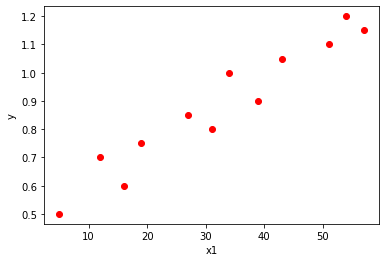

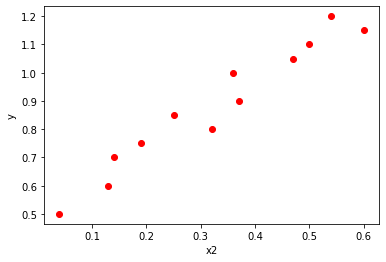

In [133]:
# Библиотека для работы с матрицами
import numpy as np
# Библиотека для построения графиков
import matplotlib.pyplot as plt
# Библиотека математических функций
import math

# Исходный обучающий массив
x1_train = [5, 12, 16, 19, 27, 31, 34, 39, 43, 51, 54, 57]
x2_train = [0.04, 0.14, 0.13, 0.19, 0.25, 0.32, 0.36, 0.37, 0.47, 0.5, 0.54, 0.6]
y_train = [0.5, 0.7, 0.6, 0.75, 0.85, 0.8, 1, 0.9, 1.05, 1.1, 1.2, 1.15]
# Приводим к формату упрощающему дальнейший расчёт
x1_train_np = np.array(x1_train)
x2_train_np = np.array(x2_train)
y_train_np = np.array(y_train)

# Строим графики зависимости у от х1 и х2
for i in range(len(y_train_np)):
    plt.plot(x1_train_np[i], y_train_np[i], 'ro')
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

for i in range(len(y_train_np)):
    plt.plot(x2_train_np[i], y_train_np[i], 'ro')
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

In [144]:
# Библиотека с функциями генерации случайных значений
import random

# Коэффициенты линейной регрессии (в начале инициализируются случайным образом)
a0 = random.uniform(-1, 1)
a1 = random.uniform(-1, 1)
a2 = random.uniform(-1, 1)

# Выводим сгенерированные коэффициенты
print("a0 = " + str(a0))
print("a1 = " + str(a1))
print("a2 = " + str(a2))

a0 = 0.615148346934435
a1 = -0.7638535380513687
a2 = 0.007236093222533491


In [135]:
# Линейная функция для одного x
def lin_func(x1, x2):
    y = a0 + a1 * x1 + a2 * x2
    return y

In [136]:
# Функция тестирования и визуализации линейной функции
def test_lin_func(x1_test_np, x2_test_np, y_test_np):
    # Вспомогательные массивы для построение линейной функции
    x1seq = np.linspace(np.min(x1_test_np), np.max(x1_test_np), 100)
    x2seq = np.linspace(np.min(x2_test_np), np.max(x2_test_np), 100)
    
    # График данных
    for i in range(len(y_test_np)):
        plt.plot(x1_test_np[i], y_test_np[i], 'ro')
    # График линейной функции
    plt.plot(x1seq, lin_func(x1seq, x2seq), 'r') 
    plt.xlabel("x1")
    plt.ylabel("y")   
    plt.show()
    
    # График данных
    for i in range(len(y_test_np)):
        plt.plot(x2_test_np[i], y_test_np[i], 'ro')
    # График линейной функции
    plt.plot(x2seq, lin_func(x1seq, x2seq), 'r') 
    plt.xlabel("x2")
    plt.ylabel("y")   
    plt.show()

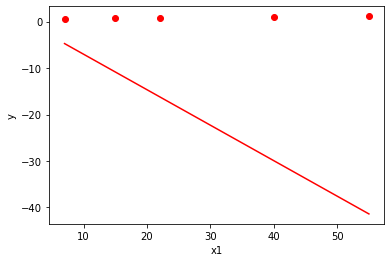

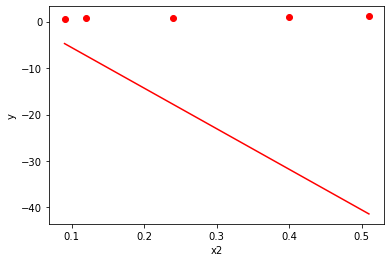

In [145]:
# Наборы тестовых данных
x1_test = [7, 15, 22, 40, 55]
x2_test = [0.09, 0.12, 0.24, 0.4, 0.51]
y_test = [0.6, 0.7, 0.8, 0.9, 1.15]
x1_test_np = np.array(x1_test)
x2_test_np = np.array(x2_test)
y_test_np = np.array(y_test)

# Тестируем исходную НЕ ОБУЧЕННУЮ модель
test_lin_func(x1_test_np, x2_test_np, y_test_np)

In [138]:
# Функция расчёта КОРНЯ СРЕДНЕЙ КВАДРАТИЧНОЙ ошибки (RMSE)
def err_func(x1_np, x2_np, y_np):
    # Считаем сумму ошибок
    O_sum = 0
    for i in range(len(y_np)):
        # Квадратичная разница по модулю между реальным значением и рассчитанным
        O_sum += math.pow((y_np[i] - lin_func(x1_np[i], x2_np[i])), 2)
    # Делим сумму ошибок на количество рассчитанных ситуаций и рассчитываем корень получившегося значений
    O = math.sqrt(O_sum / len(y_np))
    
    return O        

In [139]:
# Тестируем исходную НЕ ОБУЧЕННУЮ модель
print("rmse = " + str(err_func(x1_test_np, x2_test_np, y_test_np)))

rmse = 25.639210471381574


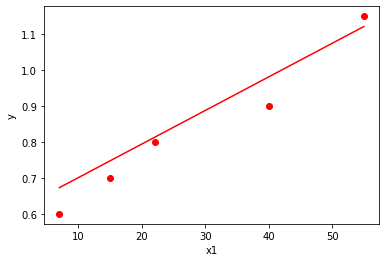

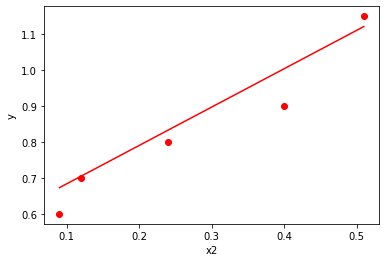

rmse = 0.05517649179114649


In [146]:
# Количество итераций обучения
I = 1000
# Константа скорости обучения
l = 0.0001

for i in range(I):
    
    n = len(y_train_np)
    
    # Рассчитываем суммы для частных производных
    O_sum = 0
    O_sum2 = 0
    O_sum_x1 = 0
    O_sum_x2 = 0
    
    for i in range(n):
        O_sum += y_train_np[i] - (a0 + a1 * x1_train_np[i] + a2 * x2_train_np[i])
        O_sum2 += math.pow((y_train_np[i] -(a0 + a1 * x1_train_np[i] + a2 * x2_train_np[i])), 2)
        O_sum_x1 += (y_train_np[i] - (a0 + a1 * x1_train_np[i] + a2 * x2_train_np[i])) * x1_train_np[i]
        O_sum_x2 += (y_train_np[i] - (a0 + a1 * x1_train_np[i] + a2 * x2_train_np[i])) * x2_train_np[i]
    
    
    # Частная производная функии КОРНЯ СРЕДНЕЙ КВАДРАТИЧНОЙ ошибки (RMSE) по a0    
    # dO/da0 = (sqrt(1/n * SUM((y - (a0 + a1 * x1 + a2 * x2))^2)))`/da0 = 1/(2 * sqrt(1/n *
    # * SUM((y - (a0 + a1 * x1 + a2 * x2))^2))) * (-2)/n * SUM(y - (a0 + a1 * x1 + a2 * x2))
    dOda0 = 1 / (2 * math.sqrt(1/n * O_sum2)) * (-2/n) * O_sum
    a0_new = a0 - l * dOda0
    
    # Частная производная функии КОРНЯ СРЕДНЕЙ КВАДРАТИЧНОЙ ошибки (RMSE) по a1
    # dO/da1 = (sqrt(1/n * SUM((y - (a0 + a1 * x1 + a2 * x2))^2)))`/da1 = 1/(2 * sqrt(1/n *
    # * SUM((y - (a0 + a1 * x1 + a2 * x2))^2))) * (-2)/n * SUM((y - (a0 + a1 * x1 + a2 * x2)) * x1)
    dOda1 = 1 / (2 * math.sqrt(1/n * O_sum2)) * (-2/n) * O_sum_x1
    a1_new = a1 - l * dOda1
    
    # Частная производная функии КОРНЯ СРЕДНЕЙ КВАДРАТИЧНОЙ ошибки (RMSE) по a2
    # dO/da2 = (sqrt(1/n * SUM((y - (a0 + a1 * x1 + a2 * x2))^2)))`/da2 = 1/(2 * sqrt(1/n *
    # * SUM((y - (a0 + a1 * x1 + a2 * x2))^2))) * (-2)/n * SUM((y - (a0 + a1 * x1 + a2 * x2)) * x2)
    dOda2 = 1 / (2 * math.sqrt(1/n * O_sum2)) * (-2/n) * O_sum_x2
    a2_new = a2 - l * dOda2
    
    a0 = a0_new
    a1 = a1_new
    a2 = a2_new
    
# Тестируем ОБУЧЕННУЮ модель
test_lin_func(x1_test_np, x2_test_np, y_test_np)
print("rmse = " + str(err_func(x1_test_np, x2_test_np, y_test_np)))

In [147]:
# Итоговый функциональный вид обученной модели
print("y = " + str(round(a0, 3)) + " + " + str(round(a1, 3)) + " * x1 +" + str(round(a2, 3)) + " * x2")

y = 0.607 + 0.009 * x1 +0.016 * x2
